# Analyse tha thinks

In [1]:
import pandas as pd
from matplotlib import pyplot
import statsmodels.api as sm
import json
import glob

## Defs

In [2]:
agencies = ['kna', 'sda', 'cic', 'kap']
path_in = '../data_cleaned/article/'

## Load files

In [3]:
filelist = glob.glob("%s*.json" % path_in)
records = []
for f in filelist:
    with open(f, encoding='utf-8') as json_file:
        records.append(json.load(json_file))

In [4]:
df = pd.DataFrame(records)
df['date'] = pd.to_datetime(df['date'])

# Analyze

## Articles per day
https://towardsdatascience.com/analyzing-time-series-data-in-pandas-be3887fdd621

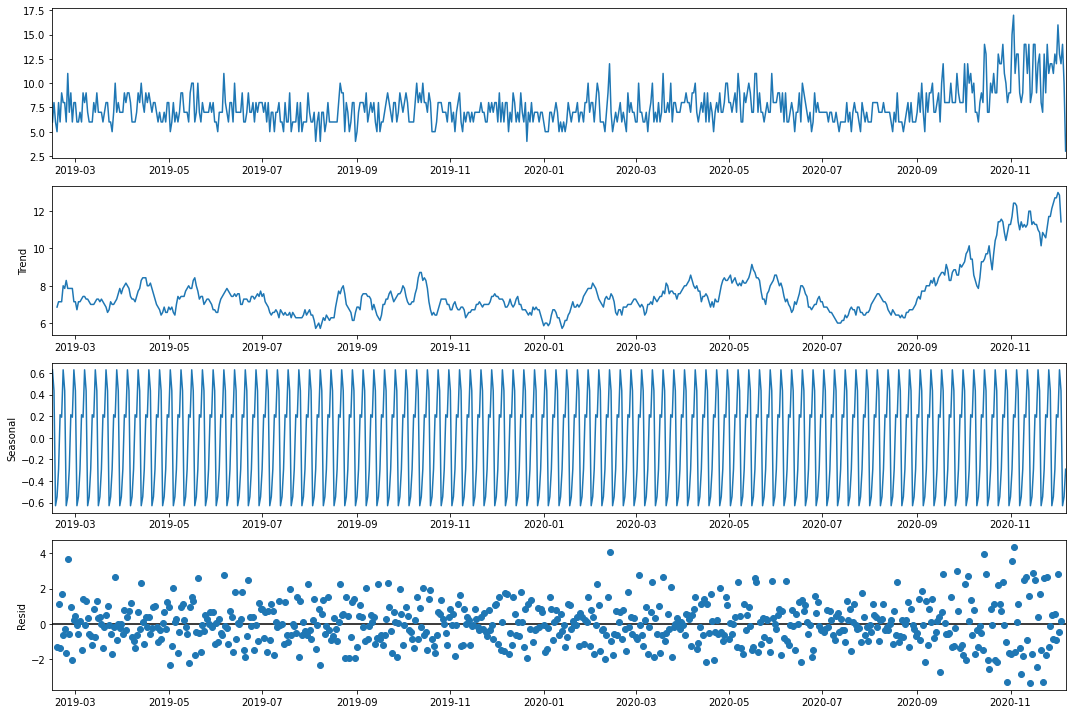

In [5]:
df_data = df.copy()
df_data['_date'] = df_data['date'].dt.date
df_data['_date'] = pd.to_datetime(df_data['_date'])
gr = df_data.groupby('_date').agg({'id': 'count'})#.reset_index()

decomposition = sm.tsa.seasonal_decompose(gr, model = 'additive')
pyplot.rcParams['figure.figsize'] = [15, 10]
fig = decomposition.plot()

## Top Writers
CIC = "Centrum Informationis Catholicum"

<AxesSubplot:xlabel='author'>

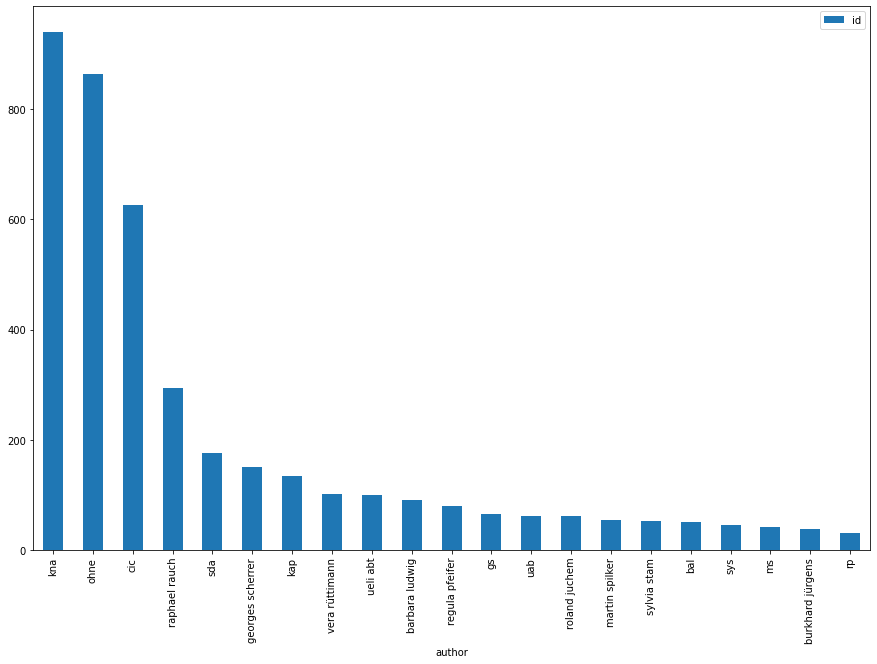

In [6]:
df_data = df.copy()

df_data['author'] = df_data['author'].fillna('ohne')

gr = df_data.groupby(df_data.author.str.lower()).agg({'id': 'count'}).sort_values('id', ascending=False)
gr = gr[gr['id'] >= 30]
gr.plot.bar()

## Writer by time

In [7]:
# Get Top Writers
df_data = df.copy()

df_data['author'] = df_data['author'].fillna('ohne')

df_top = df_data.groupby(df_data.author.str.lower()).agg({'id': 'count'}).sort_values('id', ascending=False)
df_top = df_top[df_top['id'] >= 40]
df_top['top'] = True

<AxesSubplot:xlabel='_date'>

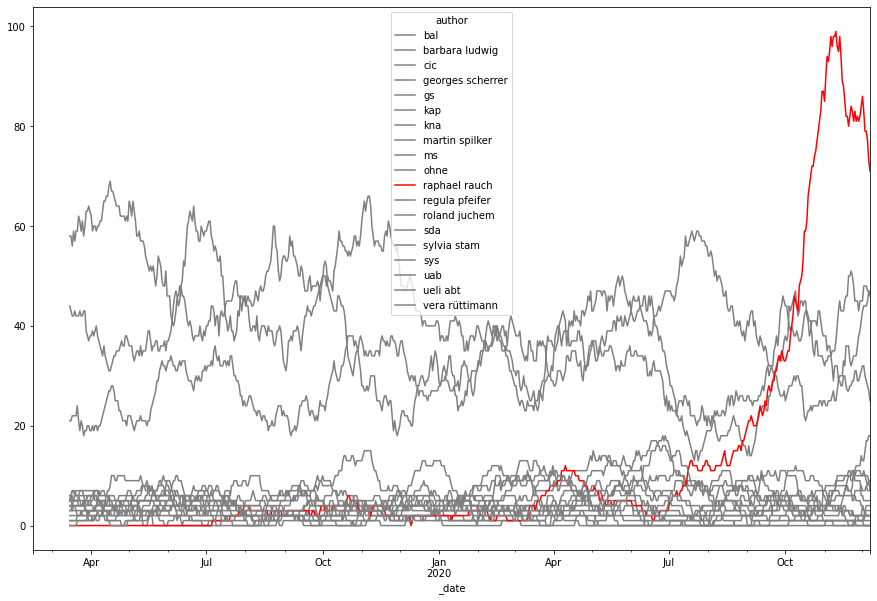

In [8]:
df_data = df.copy()

df_data['author'] = df_data['author'].fillna('ohne')

# Lower Case
df_data['author'] = df_data['author'].str.lower()

# Join
df_data = df_data.merge(df_top, how='left', on='author')
df_data['top'] = df_data['top'].fillna(False)

# Only top authors
df_data = df_data[df_data.top]

# Add Agency
df_data['agency'] = df_data['author'].apply(lambda x: x in agencies)
#df_data = df_data[df_data.agency == False]

#df_data = df_data[df_data.author != 'raphael rauch']

# Set date
df_data['_date'] = df_data['date'].dt.date
df_data['_date'] = pd.to_datetime(df_data['_date'])
df_data['_month'] = df_data['_date'].apply(lambda x: "%s-%s" % (x.year, x.month))

#df_data = df_data[['_date', 'author', 'title']]

gr = pd.pivot_table(df_data, index='_date', columns='author', values='title', aggfunc='count')
gr = gr.fillna(0)

# Add Rolling AVG
gr = gr.apply(lambda col: col.rolling(30).sum(), axis = 0)

colors = []
for c in gr.columns:
    if c == 'raphael rauch':
        colors.append('red')
    else: colors.append('grey')
    
gr.plot(color=colors)

#df_data.groupby('author').count()



In [9]:
df_abs = pd.pivot_table(df_data, index='_month', columns='author', values='title', aggfunc='count')
df_abs = df_abs.fillna(0)
df_abs['_sum'] = df_abs.sum(axis=1)

df_abs

author,bal,barbara ludwig,cic,georges scherrer,gs,kap,kna,martin spilker,ms,ohne,raphael rauch,regula pfeifer,roland juchem,sda,sylvia stam,sys,uab,ueli abt,vera rüttimann,_sum
_month,,,,,,,,,,,,,,,,,,,,
2019-10,3.0,2.0,38.0,5.0,4.0,3.0,59.0,0.0,0.0,34.0,3.0,1.0,5.0,14.0,3.0,5.0,4.0,3.0,2.0,188.0
2019-11,1.0,4.0,34.0,6.0,4.0,4.0,54.0,4.0,2.0,19.0,2.0,1.0,3.0,7.0,0.0,1.0,2.0,6.0,7.0,161.0
2019-12,2.0,4.0,29.0,6.0,1.0,3.0,42.0,5.0,3.0,34.0,2.0,3.0,3.0,13.0,4.0,3.0,1.0,5.0,3.0,166.0
2019-2,2.0,1.0,14.0,1.0,1.0,4.0,22.0,1.0,5.0,27.0,0.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,3.0,88.0
2019-3,3.0,6.0,20.0,6.0,6.0,4.0,40.0,2.0,1.0,65.0,0.0,5.0,3.0,3.0,2.0,3.0,7.0,1.0,5.0,182.0
2019-4,6.0,2.0,22.0,5.0,3.0,7.0,37.0,4.0,4.0,61.0,0.0,1.0,1.0,9.0,3.0,3.0,3.0,3.0,5.0,179.0
2019-5,0.0,2.0,32.0,3.0,3.0,7.0,37.0,4.0,0.0,51.0,0.0,5.0,5.0,6.0,4.0,9.0,9.0,3.0,7.0,187.0
2019-6,8.0,4.0,32.0,5.0,1.0,2.0,38.0,0.0,0.0,59.0,0.0,6.0,3.0,5.0,4.0,3.0,2.0,7.0,3.0,182.0
2019-7,3.0,5.0,26.0,3.0,0.0,9.0,48.0,3.0,2.0,47.0,4.0,4.0,0.0,4.0,2.0,1.0,3.0,2.0,3.0,169.0


## Kategorie Type

<AxesSubplot:xlabel='_date'>

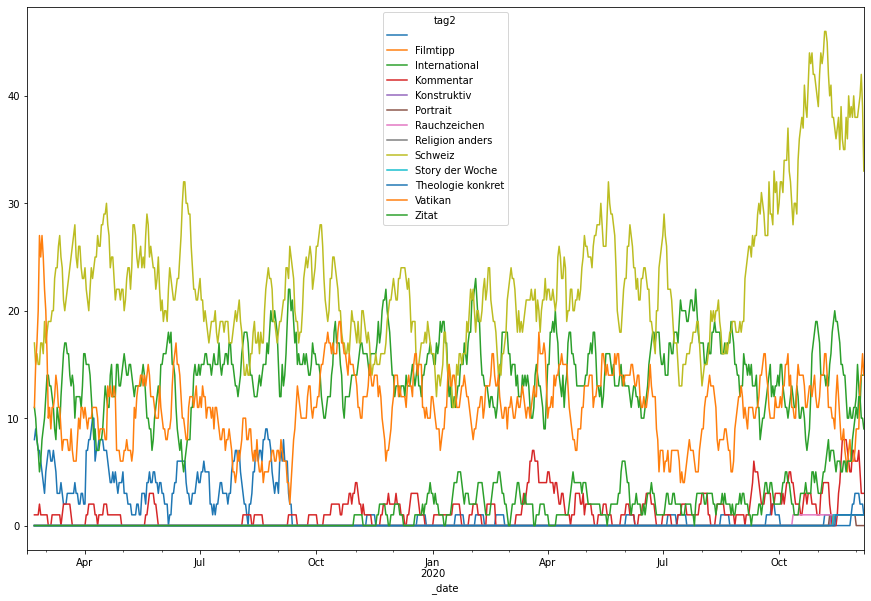

In [10]:
df_data = df.copy()

# Set date
df_data['_date'] = df_data['date'].dt.date
df_data['_date'] = pd.to_datetime(df_data['_date'])


gr = pd.pivot_table(df_data, index='_date', columns='tag2', values='title', aggfunc='count')
gr = gr.fillna(0)

# Add Rolling AVG
gr = gr.apply(lambda col: col.rolling(7).sum(), axis = 0)

gr.plot.line()

## Kategorie Type by Month

<AxesSubplot:xlabel='_date'>

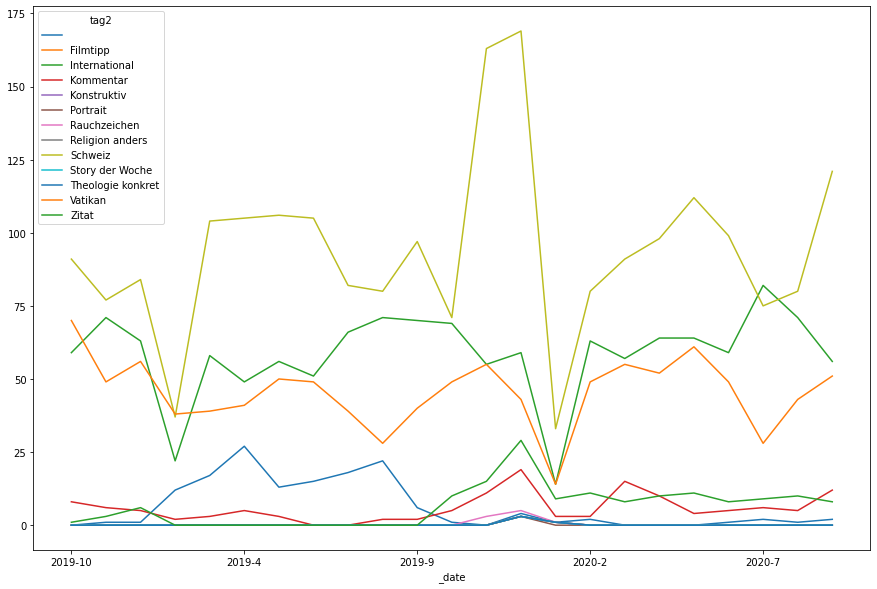

In [11]:
df_data = df.copy()

# Set date
df_data['_date'] = pd.to_datetime(df_data['date'].dt.date)
df_data['_date'] = df_data['_date'].apply(lambda x: "%s-%s" % (x.year, x.month))

gr = pd.pivot_table(df_data, index='_date', columns='tag2', values='title', aggfunc='count')
gr = gr.fillna(0)

# Add Rolling AVG
#gr = gr.apply(lambda col: col.rolling(7).sum(), axis = 0)

gr.plot.line()

<AxesSubplot:xlabel='_date'>

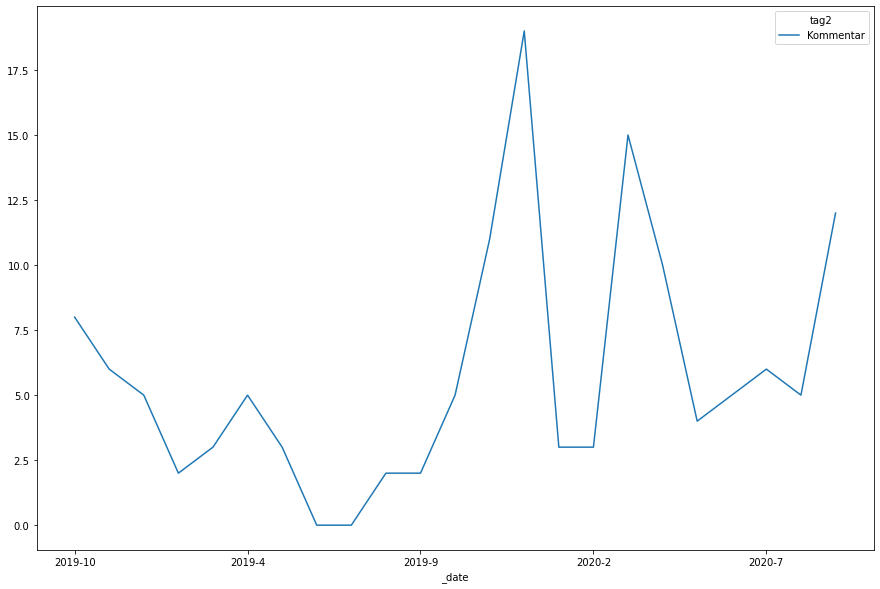

In [12]:
gr[['Kommentar']].plot.line()

## Was schreibt Rauch?

<AxesSubplot:xlabel='tag2'>

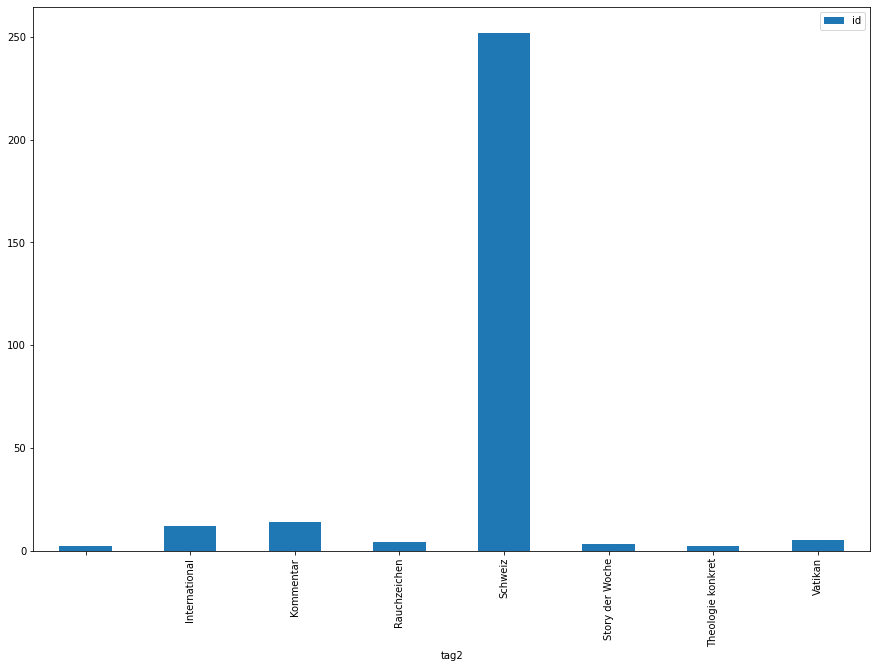

In [13]:
df_data = df.copy()

df_data['author'] = df_data['author'].str.lower()

df_data = df_data[df_data.author == 'raphael rauch']

# Group Category
df_data.groupby('tag2').agg({'id': 'count'}).plot.bar()



## Occurence of "Chur", etc

<AxesSubplot:xlabel='_date'>

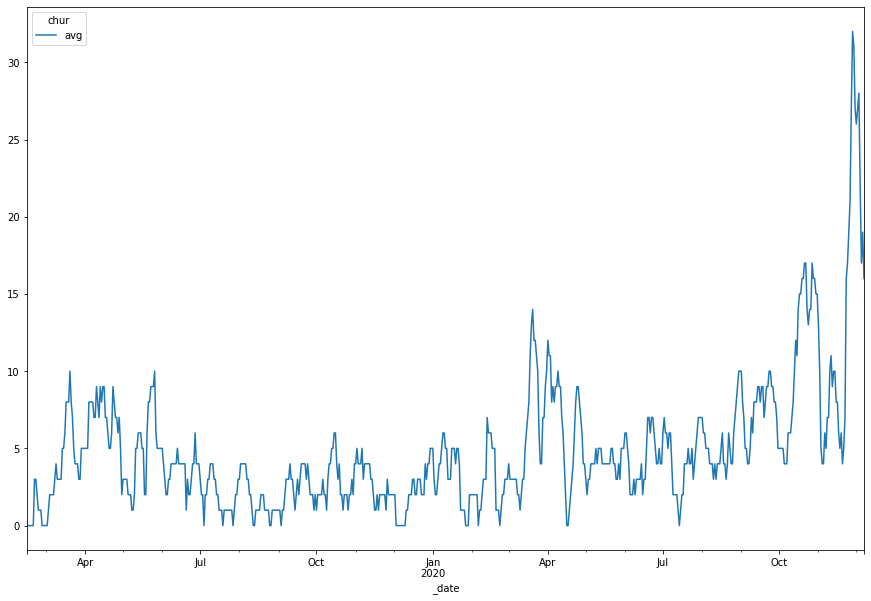

In [14]:
# Wordlist
wordlist = ['chur', 'grichting', 'huonder', 'domkapitel']

df_data = df.copy()

# Set date
df_data['_date'] = df_data['date'].dt.date
df_data['_date'] = pd.to_datetime(df_data['_date'])

# Add Chur
df_data['chur'] = df_data.text.apply(lambda x: any(s.lower() in x.lower() for s in wordlist))

# Select Only Chur
#df_data = df_data[df_data.chur]

# Group by
gr = pd.pivot_table(df_data, index='_date', values='id', columns = 'chur', aggfunc = 'count')

gr[True] = gr[True].fillna(0)

gr = gr.drop(columns=[False])

# Add Rolling AVG
gr['avg'] = gr[True].rolling(7).sum()#apply(lambda x: x.rolling(7).sum())
gr['avg'] = gr['avg'].fillna(0)

#gr.plot()
gr[['avg']].plot()

## Extract Rauch Texts

In [ ]:
df_data = df.copy()

df_data['url'] = df_data['id'].apply(lambda x: 'https://www.kath.ch/newsd/%s/' % x)

df_data[df_data.author.str.lower() == 'raphael rauch'].sort_values('date').to_csv('rauch.csv', sep = ';', encoding='UTF-8')


In [ ]:
df.sort_values('date', ascending=False).head()

## Others

In [ ]:
df_data = df.copy()

df_data['url'] = df_data['id'].apply(lambda x: 'https://www.kath.ch/newsd/%s/' % x)

df_data[df_data.author.isna()].sort_values('date', ascending=False).head(50).to_csv('noauthor.csv', sep = ';')

## Extract November

In [ ]:
df_data[(df_data.date >= '2020-11-01') & (df_data.date <= '2020-11-30')].to_csv('2020-11.csv', encoding='utf-8')

In [ ]:
len(df_data[(df_data.date >= '2019-11-01') & (df_data.date <= '2019-11-30')])

In [15]:
len(df)

5017